In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

## Data preprocessing 

### Read data and rename column

In [618]:
df = pd.read_csv('players_transformed.csv')
df = df.drop(df.columns[0], axis=1)
# Define a dictionary mapping old column names to new ones
column_renaming = {
    'name': 'Name',
    'age': 'Age',
    'nationality': 'Nationality',
    'club': 'Club',
    'height': 'Height',
    'weight': 'Weight',
    'foot': 'Foot',
    'total_matches': 'Total Matches',
    'total_goals': 'Total Goals',
    'total_assists': 'Total Assists',
    'total_goals_conceded': 'Total Goals Conceded',
    'total_cs': 'Total CS',
    'total_yellow': 'Total Yellow Cards',
    'total_red': 'Total Red Cards',
    'shot_accuracy': 'Shot Accuracy',
    'pass_completion_rate': 'Pass Completion Rate',
    'cross_completion_rate': 'Cross Completion Rate',
    'dribble_success_rate': 'Dribble Success Rate',
    'tackles': 'Tackles',
    'interception': 'Interceptions',
    'market_value': 'Market Value',
    'titles': 'Titles',
    'injuries': 'Injuries',
    'general_position': 'General Position'
}
df.rename(columns=column_renaming, inplace=True)

### Preprocessing and other functions

In [619]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

def plot_all_numerical_columns(df, col):
    """
    Plots all numerical columns in the dataframe against a specified column on the y-axis,
    with 3 plots per row.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - col (str): The name of the column to be used as the y-axis.
    """
    # Filter numerical columns in the dataframe
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Remove the y-axis column from the numerical columns
    if col in numerical_columns:
        numerical_columns.remove(col)
    
    # Set up the figure size and grid layout (3 plots per row)
    num_plots = len(numerical_columns)
    num_rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)  # Calculate number of rows needed
    plt.figure(figsize=(15, num_rows * 5))
    
    # Loop through each numerical column and create a scatter plot
    for idx, col_x in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, 3, idx)  # Adjust the grid to fit 3 plots per row
        sns.scatterplot(data=df, x=col_x, y=col, alpha=0.7)
        plt.title(f'Relationship between {col_x} and {col}')
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_relationship(df, col1, col2):
    """
    Plots the relationship between two columns in a dataframe.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - col1 (str): The name of the first column (x-axis).
    - col2 (str): The name of the second column (y-axis).
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, alpha=0.7, color='blue')
    plt.title(f'Relationship between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def correlation(df, col):
    """
    Calculates the correlation of all columns in the dataframe with a specified target column.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - col (str): The name of the column to calculate correlations with.
    
    Returns:
    - pd.Series: Correlations of each column with the target column.
    """
    df_numeric = df.select_dtypes('number')
    # Ensure the column exists in the dataframe
    if col not in df_numeric.columns:
        raise ValueError(f"Column {col} not found in the dataframe.")
    
    # Calculate correlation of all numerical columns with the target column
    correlations = df_numeric.corr()[col].sort_values(ascending=False)
    
    return correlations

def plot_correlation_matrix_all_cols(df):
    # Compute the correlation matrix
    df_numeric = df.select_dtypes('number')
    correlation_matrix = df_numeric.corr()

    # Set up the figure size
    plt.figure(figsize=(12, 8))

    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

    # Adding title and labels
    plt.title('Correlation Matrix')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

### First we view the correlation of matrix to look for columns that are too highly correlated

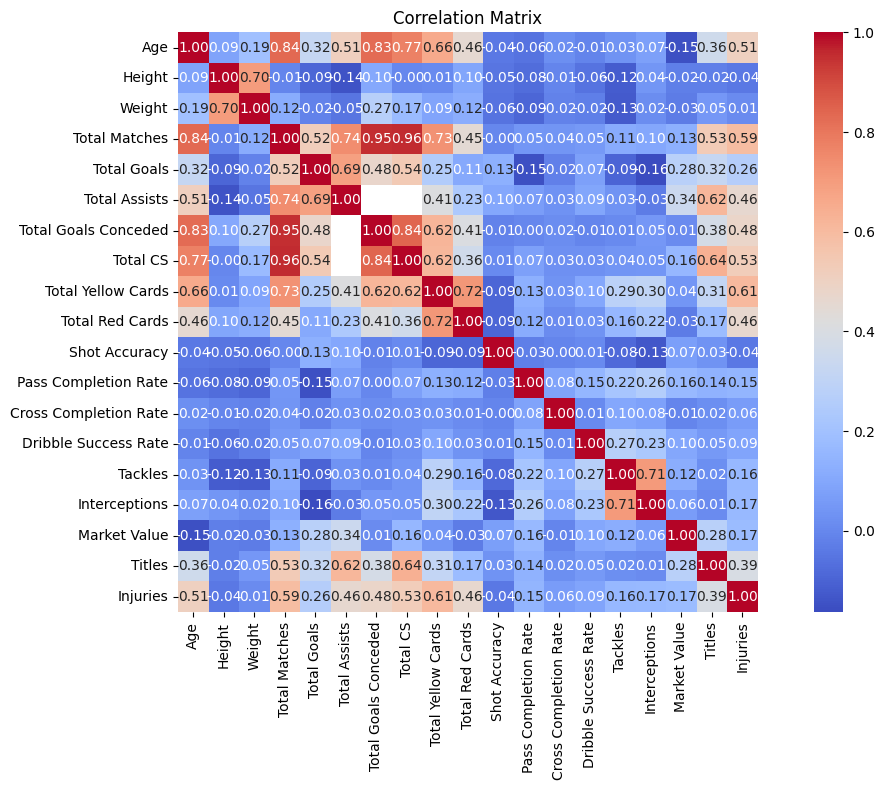

In [620]:
plot_correlation_matrix_all_cols(df)

- Total Matches, Total Goals Conceded, Total CS are too highly correlated with each other. Especially Total Matches and Total Goals Conceded, they have over 0.94 to each other and over 0.8 to Total CS. So I decided to drop Total Matches and Total Goals Conceded

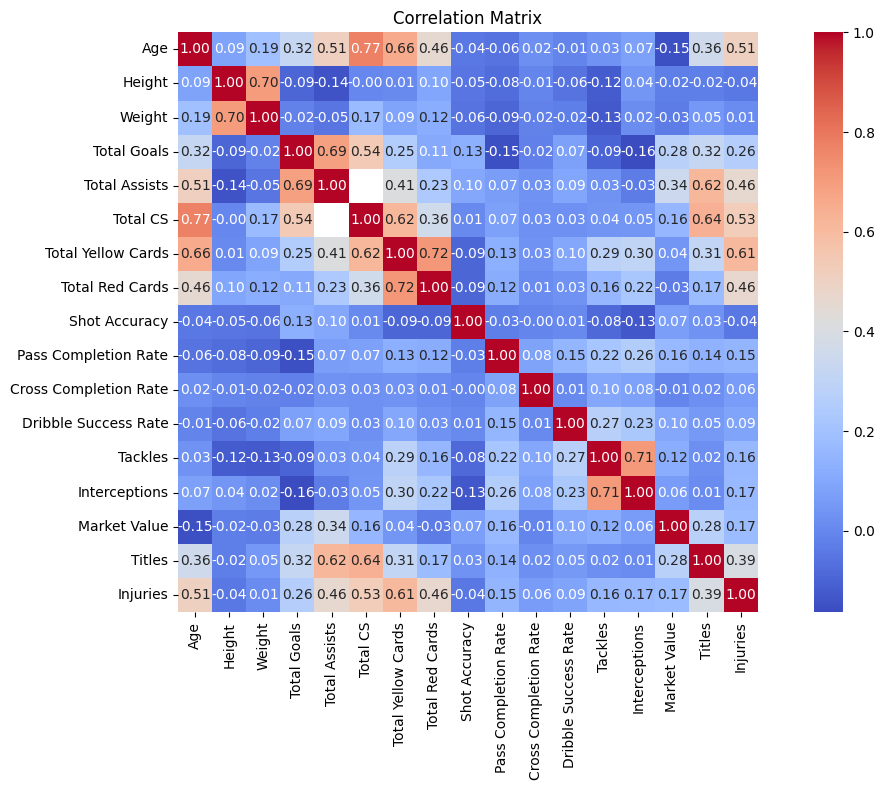

In [621]:
df = df.drop(columns=['Total Goals Conceded'])
df = df.drop(columns=['Total Matches'])
plot_correlation_matrix_all_cols(df)

### Now we look at our correlation matrix with our target feature: Market Value

In [622]:
correlation_with_target = correlation(df,'Market Value')
print(correlation_with_target)

Market Value             1.000000
Total Assists            0.344367
Titles                   0.277183
Total Goals              0.275098
Injuries                 0.174311
Pass Completion Rate     0.164840
Total CS                 0.155418
Tackles                  0.121545
Dribble Success Rate     0.098908
Shot Accuracy            0.072832
Interceptions            0.063555
Total Yellow Cards       0.043583
Cross Completion Rate   -0.005260
Height                  -0.021824
Total Red Cards         -0.033657
Weight                  -0.033994
Age                     -0.149697
Name: Market Value, dtype: float64


- We can see that the features don't really correlate with the market value as the highest corr value being total assists: 0.344367

### Preprocess to gain more insights on our data

#### 1. Remove obvious outlier detected using visualization

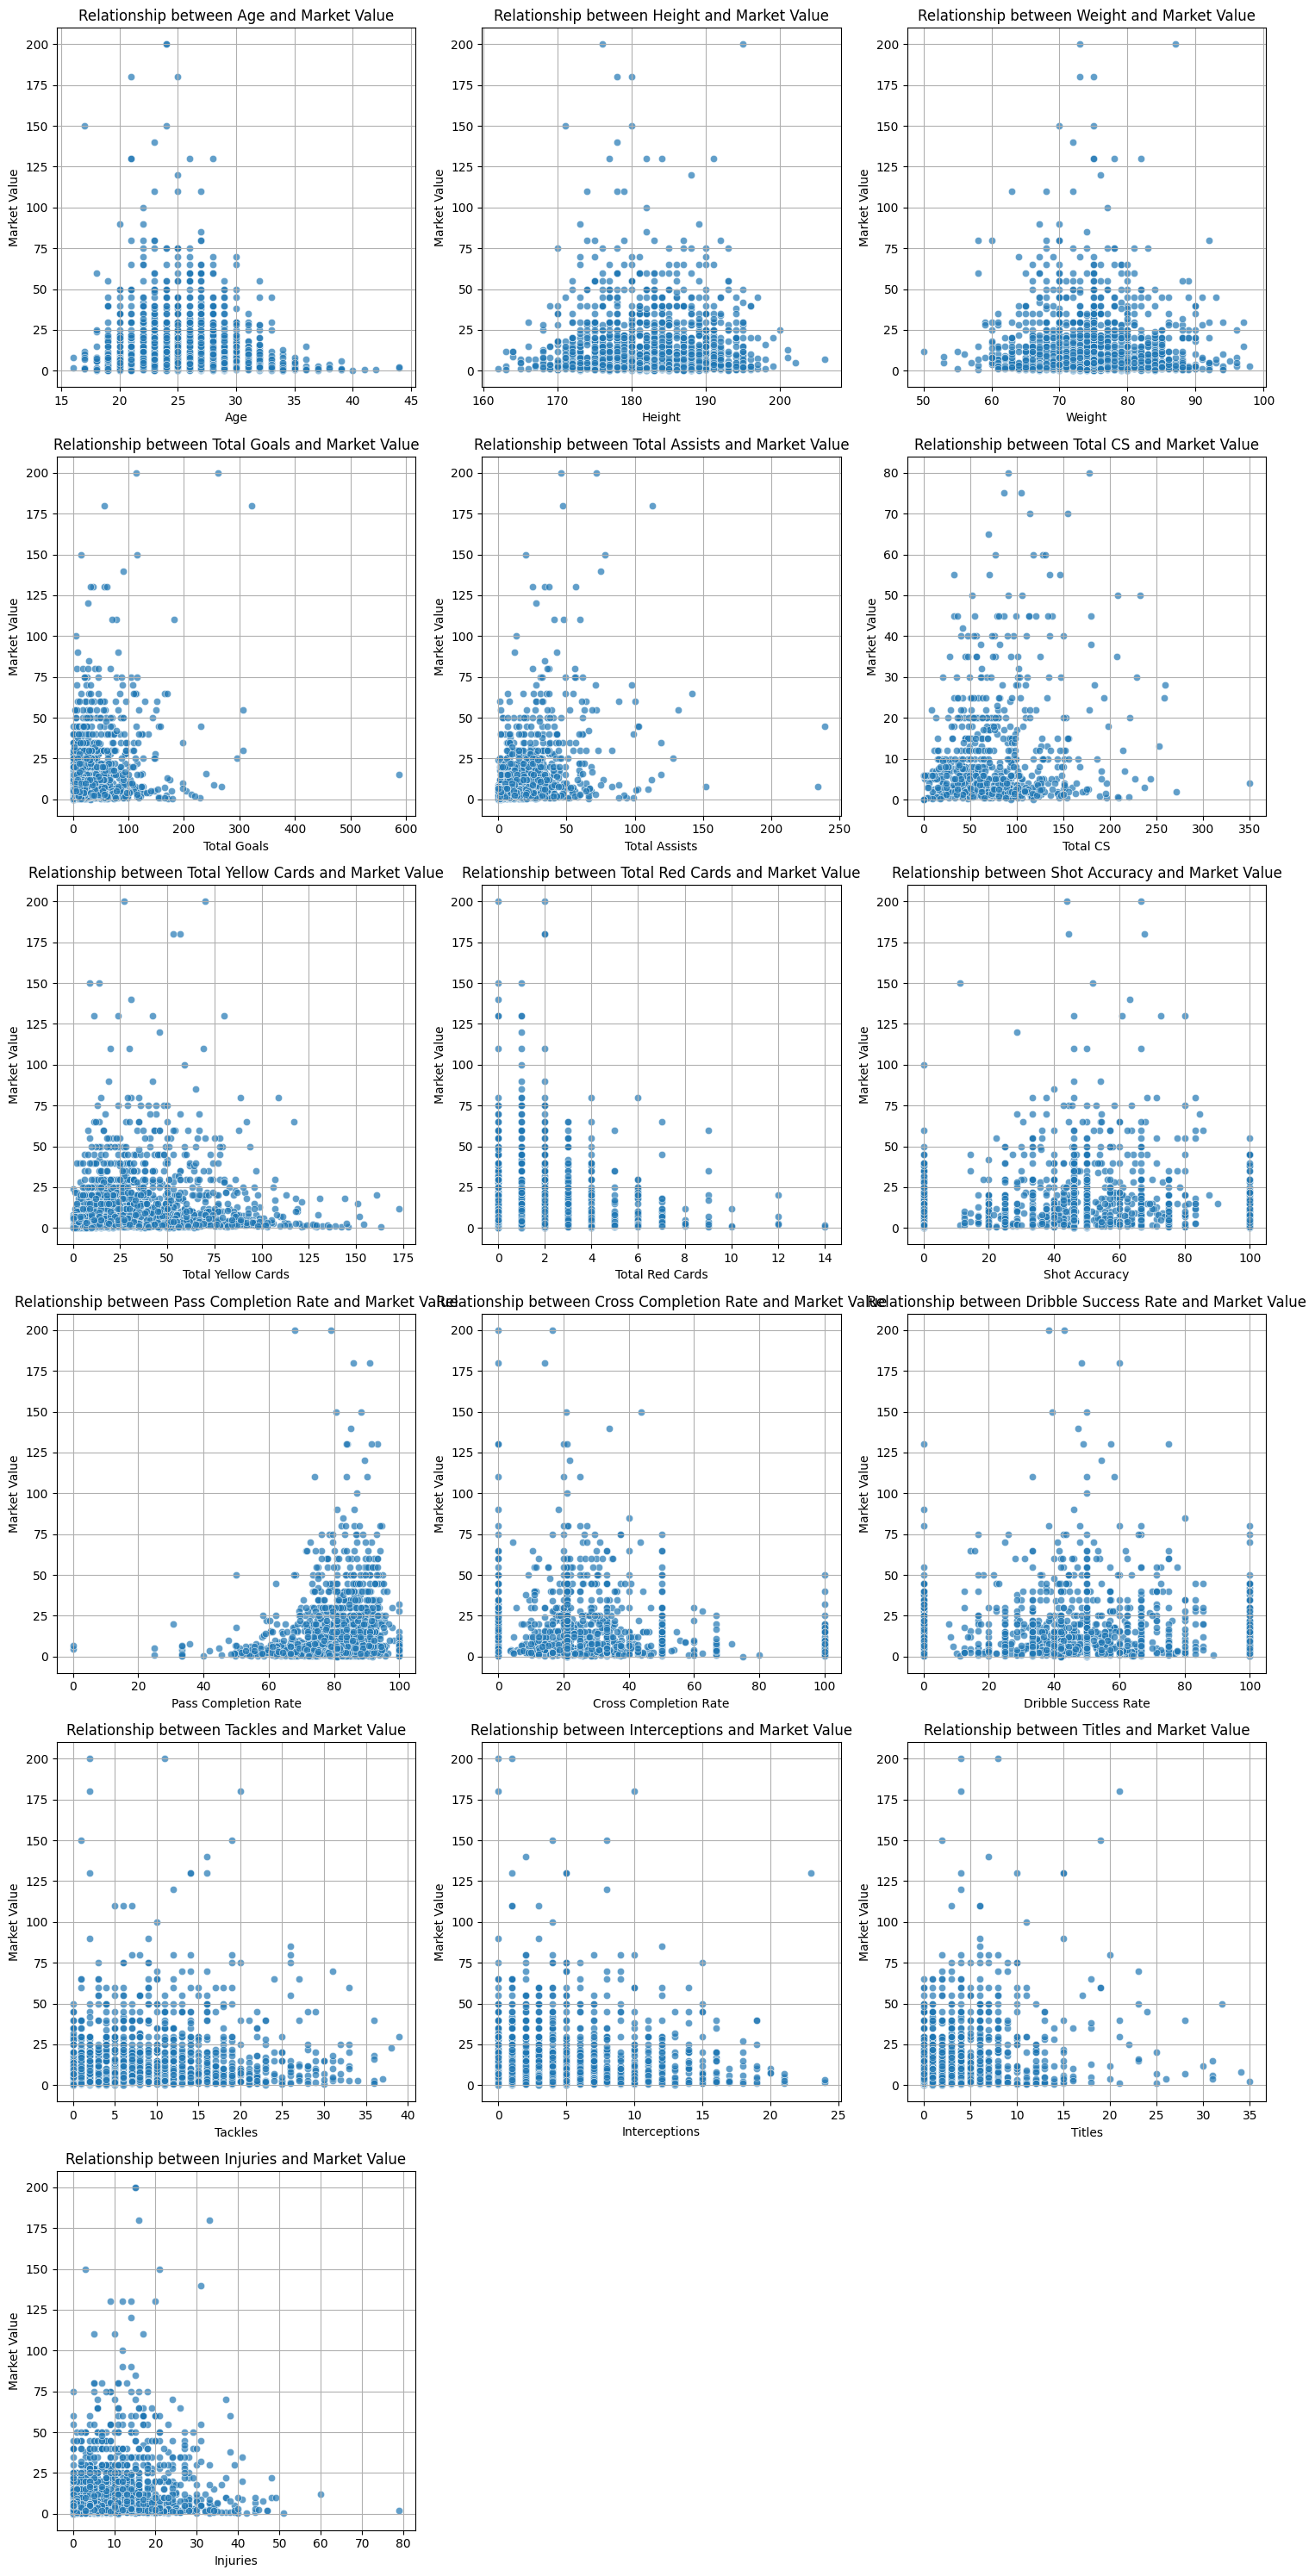

In [623]:
plot_all_numerical_columns(df,'Market Value')

In [624]:
# Treating Outliers 
df.drop(df[df['Market Value'] > 40].index, inplace=True)
df.drop(df[df['Total Assists'] > 75].index, inplace=True)
df.drop(df[df['Total Goals'] > 100].index, inplace=True)
df.drop(df[df['Total CS'] > 175].index, inplace=True)
print(df.shape)

(1641, 22)


- Also dribble success rates and shot accuracy are too evenly distributed across market value. They seemingly have no correlation with market value so I decided to drop them.

In [625]:
df = df.drop(columns=['Shot Accuracy','Dribble Success Rate'])

#### 2. As ther feature don't really correlate we can try find a new feature Score using Age, Total Goals, Total Assists for forward and midfielder and Age, Total CS for defender and goalkeepers.

In [626]:
# Apply conditional logic to calculate 'Score' based on position
df['Score'] = 0  # Initialize the 'Score' column

# For Forwards and Midfielders
df.loc[df['General Position'].isin(['Forward', 'Midfielder']), 'Score'] = (
    df['Age']**2 * (df['Total Goals'] + 1) + (df['Total Assists'] + 1)
)

# For Goalkeepers and Defenders
df.loc[df['General Position'].isin(['Goalkeeper', 'Defender']), 'Score'] = (
    df['Age']**2 * (df['Total CS'] + 1)
)
df['Score'] = np.log10(df['Score'])

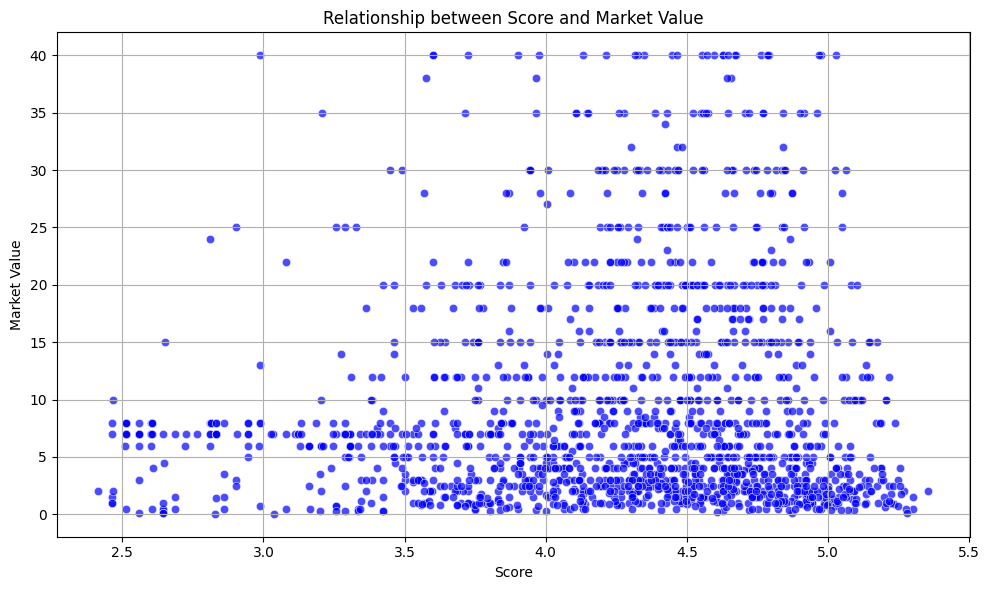

In [627]:
plot_relationship(df,'Score','Market Value')

#### 4. The remaining columns have somewhat more useful distribution and can extract information from them. So now I will perform transfomation on the data to resemble a bell curve for somewhat easier interpretation

In [628]:
right_skewed_columns = [col for col in df.select_dtypes('number').columns if df[col].skew() > 1]
left_skewed_columns = [col for col in df.select_dtypes('number').columns if df[col].skew() < -1]
for col in right_skewed_columns:
    df[f'log_{col}'] = np.log1p(df[col])  # Use log(1 + x) to handle zeros
for col in left_skewed_columns:
    df[f'log_reversed_{col}'] = np.log1p(df[col].max() + 1 - df[col])  # Reverse and log transform

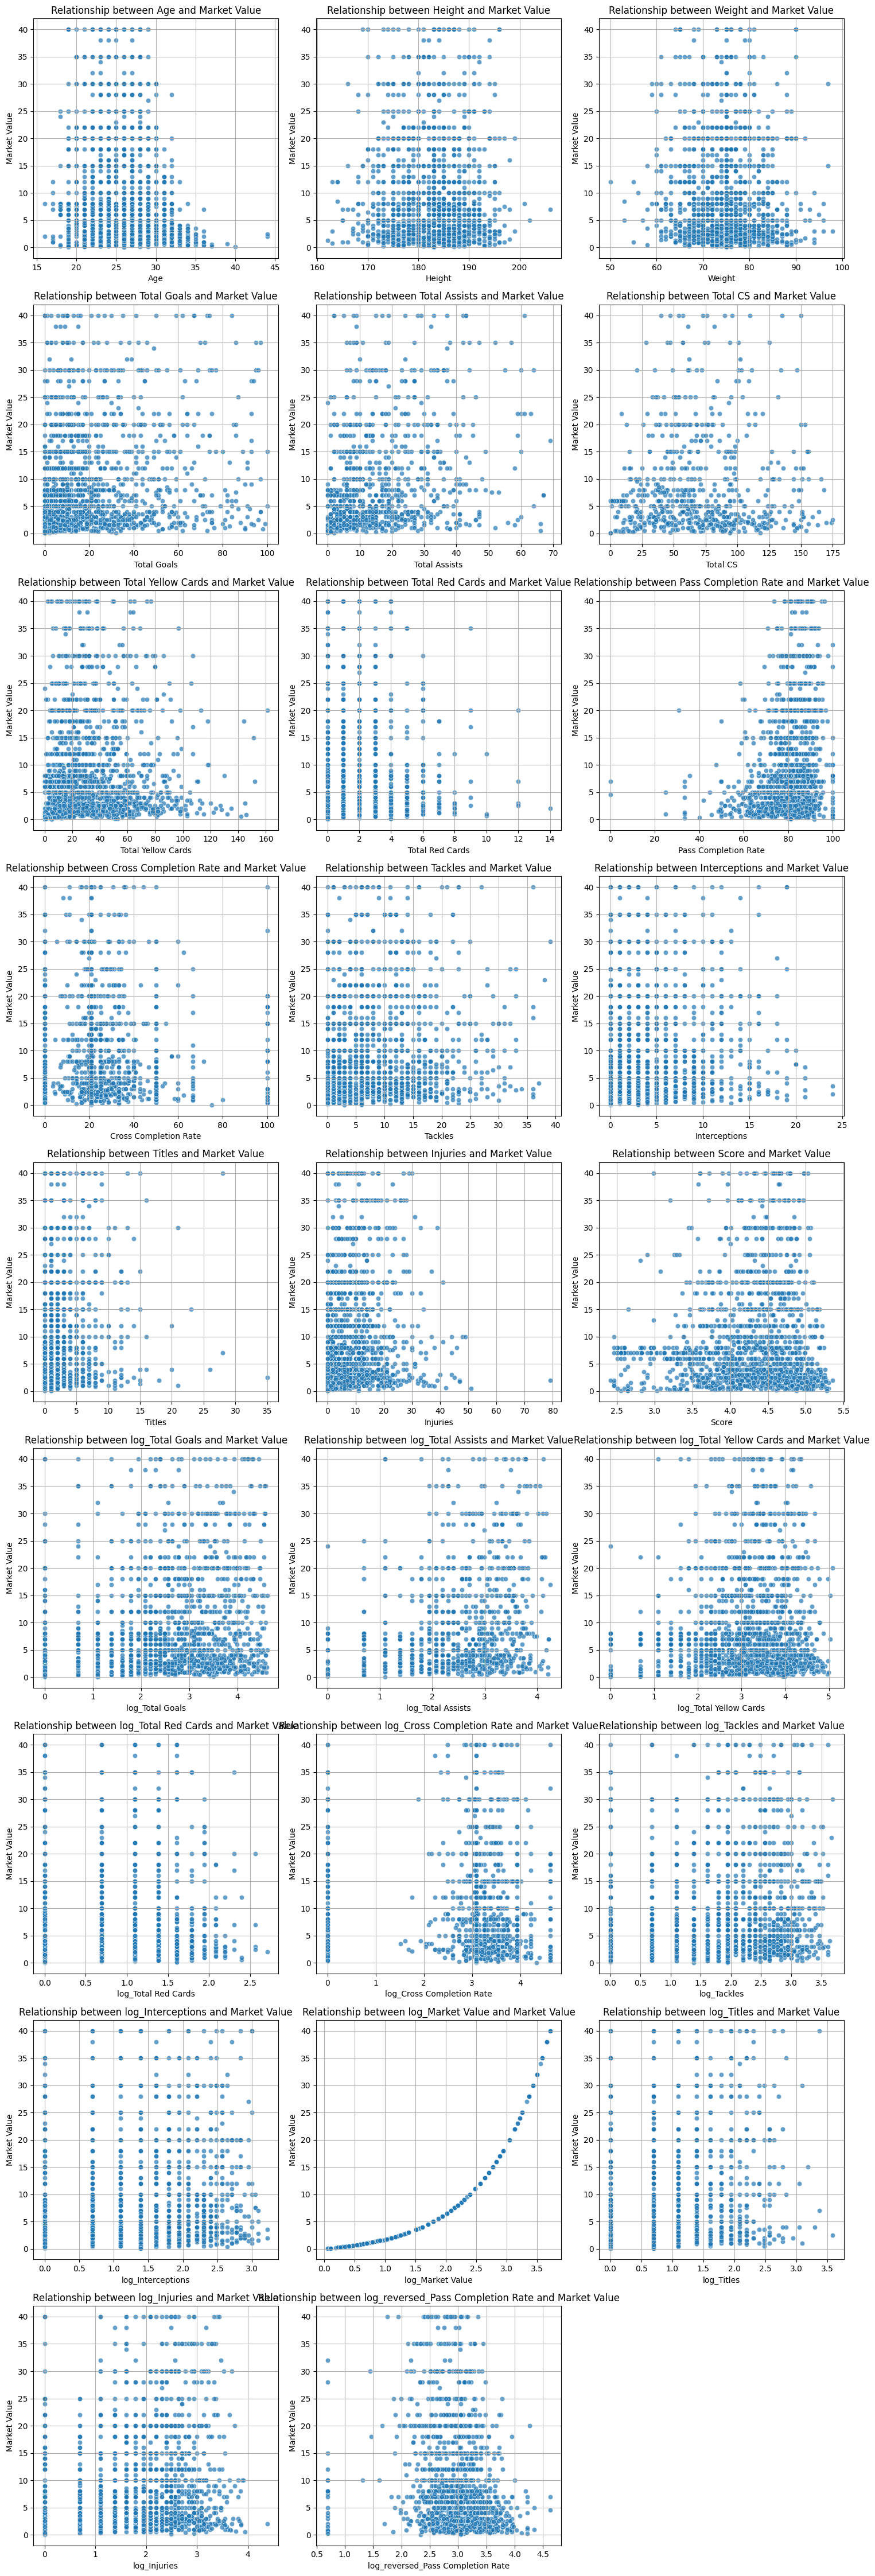

In [629]:
plot_all_numerical_columns(df, 'Market Value')

## Split the data into train set and test set

In [630]:
X = df.drop('Market Value', axis=1)  # Replace 'target_column' with your actual target column name
y_market_value = df['Market Value']
y_position = df['General Position']

# Split data into train and test sets
X_train_market_value, X_test_market_value, y_train_market_value, y_test_market_value = train_test_split(X, y_market_value, test_size=0.2, random_state=42)
X_train_position, X_test_position, y_train_position, y_test_position = train_test_split(X, y_position, test_size=0.2, random_state=42)